# Rough Load of FC C3 <img align="right" src="../Supplementary_data/dea_logo.jpg">

This notebook is to take a look at the new Collection 3 data and see how it compares to Collection 2

To do:
* Check nodata values
* Check speckle?
* Plot against the imagery for the same timestep?



* **Compatability:** Notebook currently compatible with the`DEA Sandbox` environments
* **Products used:** 


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import datacube
import pandas as pd
import sys

sys.path.append("../Scripts")
from dea_datahandling import load_ard
from dea_plotting import display_map
from dea_plotting import rgb
from odc.ui import with_ui_cbk

In [2]:
dc = datacube.Datacube(app="Load_Fractional_Cover")

In [3]:
lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.4)
#time_range = ("2020", "2021")
time_range = ("2017", "2021")

In [4]:
display_map(x=lon_range, y=lat_range)

## dc.load `ga_ls_fc_3` to take a look at the collection 3 Fractional Cover data


In [5]:
ds = dc.load(product="ga_ls_fc_3",
             x=lon_range,
             y=lat_range,
             time=time_range,
            output_crs='epsg:3577',
            resolution =(-30,30),
            group_by = 'solar_day')
#print(ds)

In [6]:
print(ds.bs)

<xarray.DataArray 'bs' (time: 3, y: 372, x: 375)>
array([[[ 2,  1,  4, ...,  0,  0,  0],
        [ 1,  2,  0, ...,  0,  0,  0],
        [ 4,  0,  0, ...,  0,  0,  0],
        ...,
        [28, 27, 29, ...,  1,  0,  0],
        [13,  6,  8, ...,  3,  2,  1],
        [19, 57, 45, ...,  0,  2,  0]],

       [[ 0,  1,  3, ...,  0,  0,  0],
        [ 1,  0,  3, ...,  0,  0,  0],
        [ 1,  2,  3, ...,  0,  0,  0],
        ...,
        [12, 10,  9, ...,  0,  3,  1],
        [16, 27, 24, ...,  2,  1,  0],
        [22, 18, 36, ...,  1,  1,  0]],

       [[ 1,  3,  3, ...,  0,  0,  0],
        [ 1,  2,  6, ...,  0,  0,  0],
        [ 0,  3,  6, ...,  0,  0,  0],
        ...,
        [ 8, 19,  9, ...,  3,  0,  2],
        [24, 11, 22, ...,  2,  0,  1],
        [19, 27, 29, ...,  3,  0,  1]]], dtype=uint8)
Coordinates:
  * time         (time) datetime64[ns] 2020-07-03T23:41:55.426739 ... 2020-08...
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x            (x

## dc.load surface reflectance and PQ data to mask Fractional Cover Data

In [7]:
# ls = dc.load(product="ga_ls7e_ard_3",
#              x=lon_range,
#              y=lat_range,
#              time=time_range,
#             output_crs='epsg:3577',
#             resolution =(-30,30),
#             group_by = 'solar_day',
#             progress_cbk=with_ui_cbk())

In [8]:
ls_all = load_ard(dc=dc, products=['ga_ls5t_ard_3','ga_ls7e_ard_3', 'ga_ls8c_ard_3'], 
              fmask_categories=['valid', 'snow', 'water'],
              mask_pixel_quality=True, 
              mask_contiguity=True,
              ls7_slc_off=True,
              dtype='native',
              x=lon_range,
              y=lat_range,
              time=time_range,
              output_crs='epsg:3577',
              resolution =(-30,30),
              group_by = 'solar_day',
             progress_cbk=with_ui_cbk())

Finding datasets
    ga_ls5t_ard_3
    ga_ls7e_ard_3
    ga_ls8c_ard_3
Applying pixel quality/cloud mask
Applying contiguity mask
Loading 3 time steps


In [9]:
ls_all

<xarray.Dataset>
Dimensions:                     (time: 3, x: 375, y: 372)
Coordinates:
  * x                           (x) float64 2.066e+06 2.066e+06 ... 2.077e+06
  * y                           (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06
    spatial_ref                 int32 3577
  * time                        (time) datetime64[ns] 2020-07-03T23:41:55.357...
Data variables:
    nbart_blue                  (time, y, x) int16 241 233 217 ... 232 233 248
    nbart_green                 (time, y, x) int16 383 372 365 ... 305 359 355
    nbart_red                   (time, y, x) int16 314 305 297 ... 270 287 298
    nbart_nir                   (time, y, x) int16 2595 2623 2449 ... 2248 2489
    nbart_swir_1                (time, y, x) int16 1009 985 893 ... 950 983 1045
    nbart_swir_2                (time, y, x) int16 468 441 414 ... 463 426 464
    oa_azimuthal_exiting        (time, y, x) float32 -19.794388 ... 65.23933
    oa_azimuthal_incident       (time, y, x) float32 134.31693 ... 80.20728
    oa_combined_terrain_shadow  (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_exiting_angle            (time, y, x) float32 1.1839905 ... 10.561737
    oa_incident_angle           (time, y, x) float32 58.360714 ... 65.439514
    oa_relative_azimuth         (time, y, x) float32 244.2993 ... 240.0954
    oa_relative_slope           (time, y, x) float32 154.11131 ... 14.967957
    oa_satellite_azimuth        (time, y, x) float32 279.27643 ... 279.27905
    oa_satellite_view           (time, y, x) float32 0.30976623 ... 1.3651482
    oa_solar_azimuth            (time, y, x) float32 34.97713 ... 39.18365
    oa_solar_zenith             (time, y, x) float32 59.292526 ... 54.583885
    oa_time_delta               (time, y, x) float32 2.3493063 ... 3.3564014
    oa_fmask                    (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_nbart_contiguity         (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
Attributes:
    crs:           epsg:3577
    grid_mapping:  spatial_ref

### Selecting and plotting a single timestep

In [10]:
first_timestep = ds.pv.isel(time=0)
#print(first_timestep)

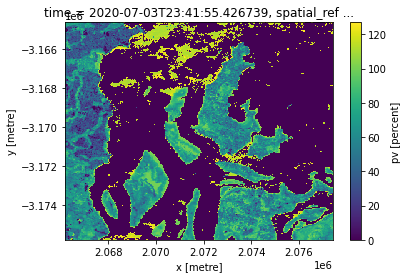

In [11]:
first_timestep.plot()

### Plot multiple timesteps


In [12]:
ds.pv

<xarray.DataArray 'pv' (time: 3, y: 372, x: 375)>
array([[[ 74,  77,  75, ..., 122, 119,   0],
        [ 78,  76,  79, ..., 127, 122, 119],
        [ 76,  80,  79, ...,   0, 123,   0],
        ...,
        [ 51,  49,  27, ...,  65,  72,  71],
        [ 67,  54,  49, ...,  64,  72,  75],
        [ 37,  29,  46, ...,  72,  76,  78]],

       [[ 77,  76,  75, ...,   0,   0,   0],
        [ 77,  80,  71, ...,   0,   0,   0],
        [ 77,  78,  71, ...,   0,   0,   0],
        ...,
        [ 54,  51,  29, ...,  64,  66,  73],
        [ 56,  59,  53, ...,  68,  71,  70],
        [ 42,  26,  40, ...,  69,  75,  77]],

       [[ 74,  74,  74, ...,   0,   0,   0],
        [ 77,  76,  73, ...,   0,   0,   0],
        [ 77,  76,  73, ...,   0,   0,   0],
        ...,
        [ 55,  46,  21, ...,  64,  69,  69],
        [ 54,  63,  50, ...,  64,  73,  71],
        [ 45,  29,  46, ...,  67,  77,  76]]], dtype=uint8)
Coordinates:
  * time         (time) datetime64[ns] 2020-07-03T23:41:55.426739 ... 2020-08...
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
    spatial_ref  int32 3577
Attributes:
    units:         percent
    nodata:        255
    crs:           epsg:3577
    grid_mapping:  spatial_ref

In [13]:
#ds.pv.plot(col="time", vmin=0, vmax =100)

In [14]:
#ds.npv.plot(col="time", robust=True)

## Plot false colour for Bare Soil, Photosynthetic and Non-Photosynthetic veg to check FC

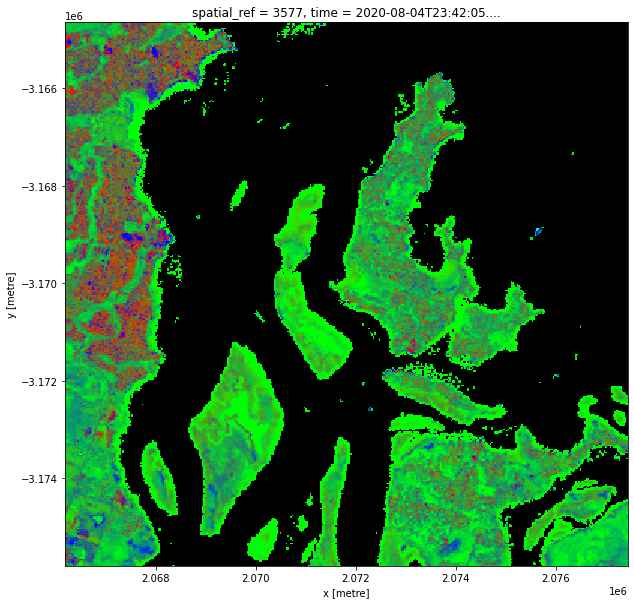

In [15]:
rgb(ds, bands=["bs", "pv", "npv"], index=-1, size =10)

## Plot Landsat surface reflectance for same image for comparison

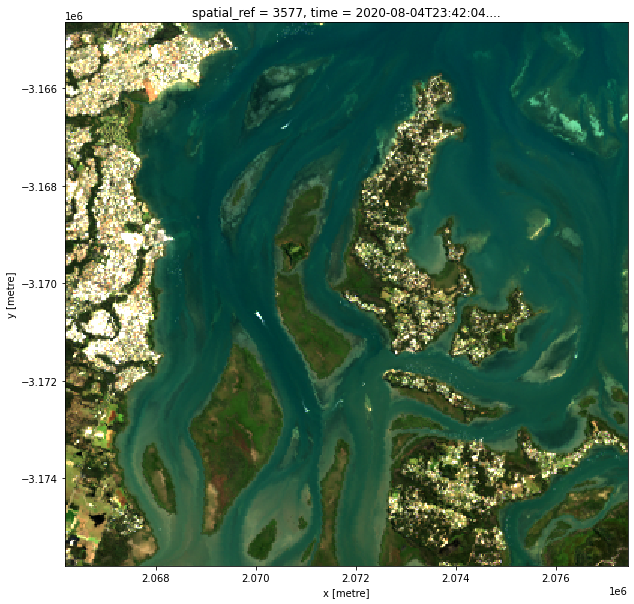

In [16]:
rgb(ls_all, bands=["nbart_red", "nbart_green", "nbart_blue"], index=-1, size =10)

## Test where array is non-zero

In [17]:
ds_filtered = ds.where(ds!=0)

In [18]:
#set bins as [0,255]
bins = list(range(0,256,1))

In [19]:

spec2 = gs.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
fig1, f1_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True)
ds_filtered.bs.isel(time=-1).plot.hist(bins=bins, size=10)

NameError: name 'fig2' is not defined

### Plotting multiple timesteps

In [ ]:
# View a true colour image for the first and fifth timesteps
rgb(ds, bands=['bs', 'pv', 'npv'], index=[0, 4])

It is also possible to use `rgb()` to plot all timesteps in a dataset using the `col="time"` syntax demonstrated in the [single band example above](#Plotting-multiple-timesteps): 

In [ ]:
# Plot all timesteps in the dataset
rgb(ds, bands=['bs', 'pv', 'npv'], col="time")

### Customising plot appearance


***
## Additional information
**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2019

**Compatible datacube version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)